# Matching entries over the course of years

## Desciption
In this notebook, we are trying to find entries (houses or flats) that appear more than once in the dataset. As we dont have the street or house number, we have to come up with an idea on how do that. 

### Benefit
What better way to show the course of the prices by looking at the same flats over time

## Procedure
We will not take any complex matching algorithm, instead we just get our hands a litte dirty and try to find them maybe even manually

#### Future
If this works well and we actually see a lof good results, you can maybe even start thinking about clustering the data my some unsupervised machine learning in order to make statements about different clusters. You can also generate them by yourself actually by seperating them more and more, e.g. houses,flats,place,number of rooms etc..

# Lukas Idee:
In welchem Stadteil hätte ich im Jahr x am besten ne Wonhung gekauft, um am schnellsten durch Miete den Kaufrpeis wieder reingeholt zu haben. Wir beachten dabei in eine Fragestellung sowohl Kaufpreis, Miete, Entwicklung über y Jahre (Mietspiegel) und können sogar noch einen zsätzlichen Datensatz mit Zinsen nehmen. Ausserdem haben wir auch nochmal lokale Unterschiede

#### oder

wir vergleichen Reutlingen Stuttgart und Tü, in welchem der Städte hätte es sich am ehesten gelohnt

#### Gewichten
wir können in unserem Matching mietveränderungne mehr gewichten, da wir von denen ein besseres Bild haben wie es sich verhalten hat

#### Auch
günstige oder teure Stadteil investieren ?
Was zahlt sich schneller aus?

#### Nebenkosten
- Entwicklung, ist die Miete teurer geworden weil einfach die Nebenkosten teuerer geworden sind?
- Korrelation Mietkosten und Nebenkosten

-------

## Update 13.12

- Feature selecting - vielleicht machen teilorte garkein Unterschied
- also vielleicht wurden in einem teilort halt einfach nur 2 zimmer wohnungen gebaut, in einem anderen 1 zimmer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/testlizenz-tuebingen-dataliteracy4students_1700939273256.csv", sep=";", encoding='unicode_escape')
df.count() 

angebot_id                    16008
anz_parken                    10830
anz_zimmer                    15865
aus_alarmanlage_janein        16008
aus_bad_dusche_janein         16008
                              ...  
oeig_dachgeschoss_janein      16008
enddate                       15707
aus_balkon_terrasse_janein    16008
aus_wintergarten_janein       16008
aus_garten_eigen_janein       16008
Length: 87, dtype: int64

In [4]:
pd.set_option('display.max_columns', None)
df

,angebot_id,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,kosten,kosten_je_flaeche,kosten_miete_gesamt_janein,kstn_betriebskosten,kstn_betriebskosten_pqm,kstn_heizung,laufzeitw_alle,laufzeitw_geschl,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,kstn_nebenkosten,kstn_miete_kalt,kstn_miete_gesamt,kstn_miete_gesamt_pqm,kstn_miete_kalt_pqm,kstn_kaufpreis,kstn_kaufpreis_pqm,kstn_heizung_pqm,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,oadr_u3,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,zust_modernisierungsjahr,zust_gepflegt_janein,startdate,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,enddate,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein
0,3594713336,NaN,"2,",0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,1,0,0,0,0,0,0,0,0,0,NaN,"55,","0,",NaN,"55,","950,","17,27",1,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8416041,8416,NaN,NaN,"950,","17,27",NaN,NaN,NaN,NaN,Tübingen,Tübingen,72070,NaN,NaN,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,1,0,0,0,NaN,0,2023-11-15,NaN,0,0,0,0,0,0,0,0,-1,NaN,1,0,-1
1,3594016393,NaN,"2,",0,1,0,0,0,0,0,0,0,0,Gas,0,0,0,NaN,0,1,0,0,1,0,0,0,0,0,0,0,1980.0,"50,","0,","3,","50,","750,","15,",0,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8416041,8416,"120,","750,","870,","17,4","15,",NaN,NaN,NaN,Tübingen,Tübingen,72070,Tübingen,Universität,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,1,0,0,2023.0,0,2023-11-15,WHG_M,0,0,0,0,0,1,0,0,-1,NaN,0,0,0
2,3593975043,NaN,"1,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1984.0,"40,","0,",NaN,"40,","400,","10,",0,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8416041,8416,"40,","400,","440,","11,","10,",NaN,NaN,NaN,Tübingen,Tübingen,72076,Tübingen,Schönblick/Waldhäuser Ost,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-11-15,WHG_M,0,0,0,0,0,0,0,0,-1,NaN,1,0,0
3,3594255459,1.0,"3,",0,1,1,0,1,0,0,0,0,0,NaN,1,0,0,Zentral,0,0,0,0,1,0,0,1,0,0,0,0,2011.0,"109,58","3,",NaN,"109,58","1750,","15,97",0,NaN,NaN,NaN,",2",NaN,miete,Wohn,8,8416041,8416,"300,","1750,","2050,","18,71","15,97",NaN,NaN,NaN,Tübingen,Tübingen,72074,Tübingen,Zentrum,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,1,2023-11-14,WHG_M,0,0,0,0,0,1,0,-1,0,NaN,1,0,0
4,3594061704,1.0,"3,",0,0,0,0,1,0,0,0,0,0,Öl,0,0,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,1985.0,"96,","1,",NaN,"96,","345000,","3593,75",0,"20,",",21",NaN,",2",NaN,kauf,Wohn,8,8416041,8416,NaN,NaN,NaN,NaN,NaN,"345000,","3593,75",NaN,Tübingen,Tübingen,72072,Bühl,Bühl,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-11-14,WHG_K,0,0,0,0,0,1,0,0,0,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,3041045247,NaN,"2,5",0,1,0,1,1,0,0,0,0,0,Gas,0,0,0,Zentral,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"104,",NaN,NaN,"104,","825,","7,93",0,NaN,NaN,NaN,"186,9","186,9",miete,Wohn,8,8416041,8416,"260,","825,","1085,","10,43","7,93",NaN,NaN,NaN,Tübingen,Tübingen,72076,NaN,NaN,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0

In [5]:
df[df["nachfrageart"]=="miete"].count()

angebot_id                    10854
anz_parken                     6834
anz_zimmer                    10829
aus_alarmanlage_janein        10854
aus_bad_dusche_janein         10854
                              ...  
oeig_dachgeschoss_janein      10854
enddate                       10810
aus_balkon_terrasse_janein    10854
aus_wintergarten_janein       10854
aus_garten_eigen_janein       10854
Length: 87, dtype: int64

In [6]:
df[df["nachfrageart"]=="miete"]["kstn_miete_gesamt_pqm"].isna().sum()

729

### First, we need to identify the columns that may change over time

- angebot_id
- kosten
- kosten_je_flaeche
- kosten_miete_gesamt_janein
- kstn_betriebskosten
- kstn_betriebskosten_pqm
- kstn_heizung	
- laufzeitw_alle	
- laufzeitw_geschl
- kstn_nebenkosten
- kstn_miete_kalt
- kstn_miete_gesamt
- kstn_miete_gesamt_pqm
- kstn_miete_kalt_pqm
- kstn_kaufpreis
- kstn_kaufpreis_pqm
- kstn_heizung_pqm
- zust_modernisierungsjahr
- zust_gepflegt_janein
- startdate
- enddate


#### kick them out

In [7]:
subset = ["angebot_id", "kosten", "kosten_je_flaeche", "kosten_miete_gesamt_janein", "kstn_betriebskosten", "kstn_betriebskosten_pqm", "kstn_heizung", "laufzeitw_alle", "laufzeitw_geschl", "kstn_nebenkosten", "kstn_miete_kalt", "kstn_miete_gesamt", "kstn_miete_gesamt_pqm", "kstn_miete_kalt_pqm", "kstn_kaufpreis", "kstn_kaufpreis_pqm", "kstn_heizung_pqm", "zust_modernisierungsjahr", "zust_gepflegt_janein", "startdate", "enddate"]
df_agg = df.drop(subset, axis=1)

In [8]:
print("number of entries: ", len(df_agg))
print(f"number of duplicates: {df_agg.duplicated(keep=False).sum()}")

number of entries:  16008
number of duplicates: 418


In [9]:
df_duplications = df_agg[df_agg.duplicated(keep=False)]
duplicates_reset = df_duplications.reset_index(drop=True)

In [10]:
duplicates_reset

,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,oadr_u3,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein
0,NaN,"4,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"90,",NaN,NaN,"90,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,NaN,NaN,NaN,Einheit,Wohnung,4-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,"1,",0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,1,0,0,0,0,0,0,0,NaN,"32,",NaN,NaN,"32,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,NaN,NaN,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,1,0,0,0,1,0,0
2,NaN,"1,",0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,1,0,0,0,0,0,0,0,NaN,"32,",NaN,NaN,"32,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,NaN,NaN,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,1,0,0,0,1,0,0
3,1.0,"1,",0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,0,0,0,1980.0,"28,","1,",NaN,"28,",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Derendingen,Feuerhägle/Mühlenviertel,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_K,0,1,0,0,0,1,0,0,0,0,0,0
4,NaN,"1,5",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,"45,","1,",NaN,"45,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,NaN,NaN,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,"4,5",0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,Zentral,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"106,7","2,",NaN,"106,7",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72070,Tübingen,Zentrum,NaN,Einheit,Wohnung,4-Z-Whg,Wohnung,0,1,0,0,WHG_K,0,0,0,0,0,0,0,0,0,0,0,0
414,1.0,"1,",0,1,0,0,0,0,0,0,0,0,Öl,0,0,0,Zentral,0,0,0,0,0,0,0,1,0,1,0,0,1972.0,"35,",",5",NaN,"35,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Derendingen,NaN,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,1,0,0,-1,1,0,0
415,NaN,"4,5",0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,Zentral,0,0,0,0,0,0,0,0,0,0,0,0,NaN,"106,7","2,",NaN,"106,7",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72070,Tübingen,Zentrum,NaN,Einheit,Wohnung,4-Z-Whg,Wohnung,0,1,0,0,WHG_K,0,0,0,0,0,0,0,0,0,0,0,0
416,2.0,"11,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,1,0,1,0,0,1306.0,"330,",NaN,NaN,"330,",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,Lustnau,NaN,NaN,Gebaeude,Wohnhaus,MFH,MFH/WGH,1,0,0,0,MFHWGH_K,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
grouped_duplicates = duplicates_reset.groupby(list(duplicates_reset.columns), dropna=True).size().reset_index().rename(columns={0:'count'})
grouped_duplicates


,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,oadr_u3,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,count


In [12]:
grouped_duplicates = duplicates_reset.groupby(list(duplicates_reset.columns), dropna=False).size().reset_index().rename(columns={0:'count'})
grouped_duplicates.sort_values(by=['count'], ascending=False)


,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,oadr_u3,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,count
67,1.0,"3,",0,0,1,0,1,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,1,0,0,1,0,0,0,0,1983.0,"81,","2,","5,","81,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,Lustnau,Lustnau-Zentrum/Herrlesberg/Stäudach,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,WHG_M,1,0,0,0,0,1,0,0,-1,1,0,0,4
148,NaN,"1,5",0,1,0,0,0,0,1,0,0,0,Alternativ,0,0,0,Zentral,0,0,0,1,0,0,0,0,0,0,0,0,1972.0,"37,",NaN,NaN,"37,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72076,Tübingen,Universität,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,0,0,0,1,0,0,0,4
0,1.0,"1,",0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,0,0,0,1980.0,"28,","1,",NaN,"28,",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Derendingen,Feuerhägle/Mühlenviertel,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_K,0,1,0,0,0,1,0,0,0,0,0,0,3
31,1.0,"2,",0,0,0,0,1,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,0,0,0,NaN,"56,55","1,","2,","56,55",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,NaN,NaN,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,1,0,WHG_M,0,0,0,0,0,1,0,0,0,1,0,0,3
102,2.0,"1,",0,0,0,0,1,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,1,0,0,1,0,0,0,0,1998.0,"34,","0,",NaN,"34,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,Lustnau,Lustnau-Zentrum/Herrlesberg/Stäudach,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,1,0,WHG_M,0,0,0,0,0,1,0,-1,-1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1.0,"3,",0,1,0,1,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,0,0,0,1971.0,"85,","-,5",NaN,"85,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Weilheim,Weilheim,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,1,0,WHG_M,0,0,0,0,0,1,0,0,-1,1,0,-1,2
73,1.0,"3,",0,1,0,1,0,0,0,0,0,0,Öl,0,0,0,Zentral,0,1,1,0,0,0,0,1,0,1,0,0,NaN,"74,","2,","3,","74,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Kilchberg,Kilchberg,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,1,0,0,WHG_M,0,0,0,0,0,1,0,0,1,0,0,0,2
74,1.0,"3,",0,1,0,1,1,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,0,0,0,2001.0,"71,59","2,","3,","71,59",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72070,Hirschau,Hirschau,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,1,0,WHG_M,0,0,0,0,1,1,0,-1,1,0,0,0,2
75,1.0,"3,",0,1,0,1,1,0,0,0,0,0,Öl,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,0,0,0,1972.0,"85,98","1,",NaN,"85,98",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72076,Tübingen,Wanne,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,1,0,0,0,1,0,0,2


In [13]:
grouped_duplicates["count"].sum()

418

In [14]:
duplicates_reset.columns.to_list()

['anz_parken',
 'anz_zimmer',
 'aus_alarmanlage_janein',
 'aus_bad_dusche_janein',
 'aus_bad_gaestewc_janein',
 'aus_bad_mit_fenster_janein',
 'aus_bad_wanne_janein',
 'aus_heiz_alt_erdw_janein',
 'aus_heiz_alt_solar_janein',
 'aus_heiz_alt_pellet_janein',
 'aus_heiz_alt_pumpe_janein',
 'aus_heiz_blockkw_janein',
 'aus_heiz_befeuerung',
 'aus_heiz_fernwaerme_janein',
 'aus_heiz_fussboden_janein',
 'aus_heiz_keine_janein',
 'aus_heiz_system',
 'aus_kamin_janein',
 'aus_kueche_einbau_janein',
 'aus_kueche_offen_janein',
 'aus_kueche_pantry_janein',
 'aus_lift_janein',
 'aus_moebliert_janein',
 'aus_parken_carport_janein',
 'aus_parken_janein',
 'aus_parken_ladestation_janein',
 'aus_parken_stellplaetze_janein',
 'aus_pool_janein',
 'aus_sauna_janein',
 'baujahr',
 'flaeche',
 'etage',
 'etagen',
 'fl_wohnen',
 'nachfrageart',
 'nutzungsart',
 'oadr_bl',
 'oadr_gkz',
 'oadr_kkz',
 'oadr_kreis',
 'oadr_ort',
 'oadr_plz',
 'oadr_u1',
 'oadr_u2',
 'oadr_u3',
 'objektart',
 'objekttyp',
 'obj

In [15]:
duplicates_reset.groupby(duplicates_reset.columns.tolist(),as_index=False, dropna=False).size()

,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,oadr_u3,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,size
0,1.0,"1,",0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,0,0,0,1980.0,"28,","1,",NaN,"28,",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Derendingen,Feuerhägle/Mühlenviertel,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_K,0,1,0,0,0,1,0,0,0,0,0,0,3
1,1.0,"1,",0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,1,0,0,1,0,1,0,0,1977.0,"37,5",NaN,NaN,"37,5",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,Tübingen,Universität,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,1,0,0,WHG_M,0,0,0,0,0,1,0,0,0,1,0,0,3
2,1.0,"1,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,Zentral,0,1,0,0,0,0,0,1,0,1,0,0,NaN,"31,",NaN,NaN,"31,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72070,Tübingen,Zentrum,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,1,0,0,0,1,0,0,3
3,1.0,"1,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,1970.0,"17,",NaN,NaN,"17,",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,Lustnau,Aeule,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,0,0,0,0,1,0,0,2
4,1.0,"1,",0,0,0,0,1,0,0,0,0,0,Elektro,0,0,0,Etage,0,1,0,0,0,0,0,1,0,1,0,0,1980.0,"42,99",NaN,NaN,"42,99",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72070,Tübingen,Weststadt,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,0,0,1,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,"5,",0,0,1,0,0,0,1,0,0,0,Gas,0,1,0,Zentral,0,0,0,0,0,1,0,0,0,0,0,0,2014.0,"135,54",NaN,NaN,"135,54",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Kilchberg,Kilchberg,NaN,Gebaeude,Wohnhaus,EFH,EZFH,0,0,0,1,EZFH_K,0,0,0,1,0,1,1,-1,0,1,0,0,2
196,NaN,"5,",0,1,0,1,1,0,0,0,0,0,NaN,1,1,0,Zentral,0,1,1,0,1,0,0,1,0,1,0,0,2020.0,"148,28","4,","5,","148,28",miete,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Tübingen,Au/Unterer Wert/Französiches Viertel,NaN,Einheit,Wohnung,4+-Z-Whg,Wohnung,0,0,0,0,WHG_M,0,0,0,1,1,1,0,-1,1,1,0,0,2
197,NaN,"7,",0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,2012.0,"149,",NaN,NaN,"149,",kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72074,NaN,NaN,NaN,Gebaeude,Wohnhaus,EFH,EZFH,0,0,0,0,EZFH_K,0,0,0,1,0,0,0,-1,0,0,0,0,2
198,NaN,NaN,0,0,0,0,0,0,0,0,0,0,Gas,0,0,0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,1992.0,"130,",NaN,"4,",NaN,kauf,Wohn,8,8416041,8416,Tübingen,Tübingen,72072,Tübingen,Südstadt,NaN,Einheit,Wohnung,kA-Z-Whg,Wohnung,0,0,0,0,WHG_K,0,1,0,0,0,1,0,0,0,0,0,0,2


# Look at each region individually

In [16]:
interesting_prices = ["kstn_miete_gesamt", "kstn_miete_kalt", "kstn_miete_gesamt_pqm", "kstn_nebenkosten",]

In [17]:
for i in interesting_prices:
    df[i] = df[i].str.replace(",", ".").astype(float)


In [18]:
df['year'] = df['startdate'].str[:4] 

In [19]:
df_top_5 = df.groupby("oadr_u2").size().nlargest(5)
df_top_5

oadr_u2
Weststadt      1053
Südstadt       1047
Universität    1030
Zentrum         727
Wanne           661
dtype: int64

In [20]:
filtered_df = df[df['oadr_u2'].isin(df_top_5.index)]

In [21]:
df_mean = filtered_df.groupby(["oadr_u2", "year"])['kstn_miete_gesamt'].mean().reset_index(name='mean')
df_mean

,oadr_u2,year,mean
0,Südstadt,2011,1500.000000
1,Südstadt,2012,987.284091
2,Südstadt,2013,856.850000
3,Südstadt,2014,953.952143
4,Südstadt,2015,968.620690
...,...,...,...
60,Zentrum,2019,995.514286
61,Zentrum,2020,1085.435283
62,Zentrum,2021,1124.546620
63,Zentrum,2022,932.138529


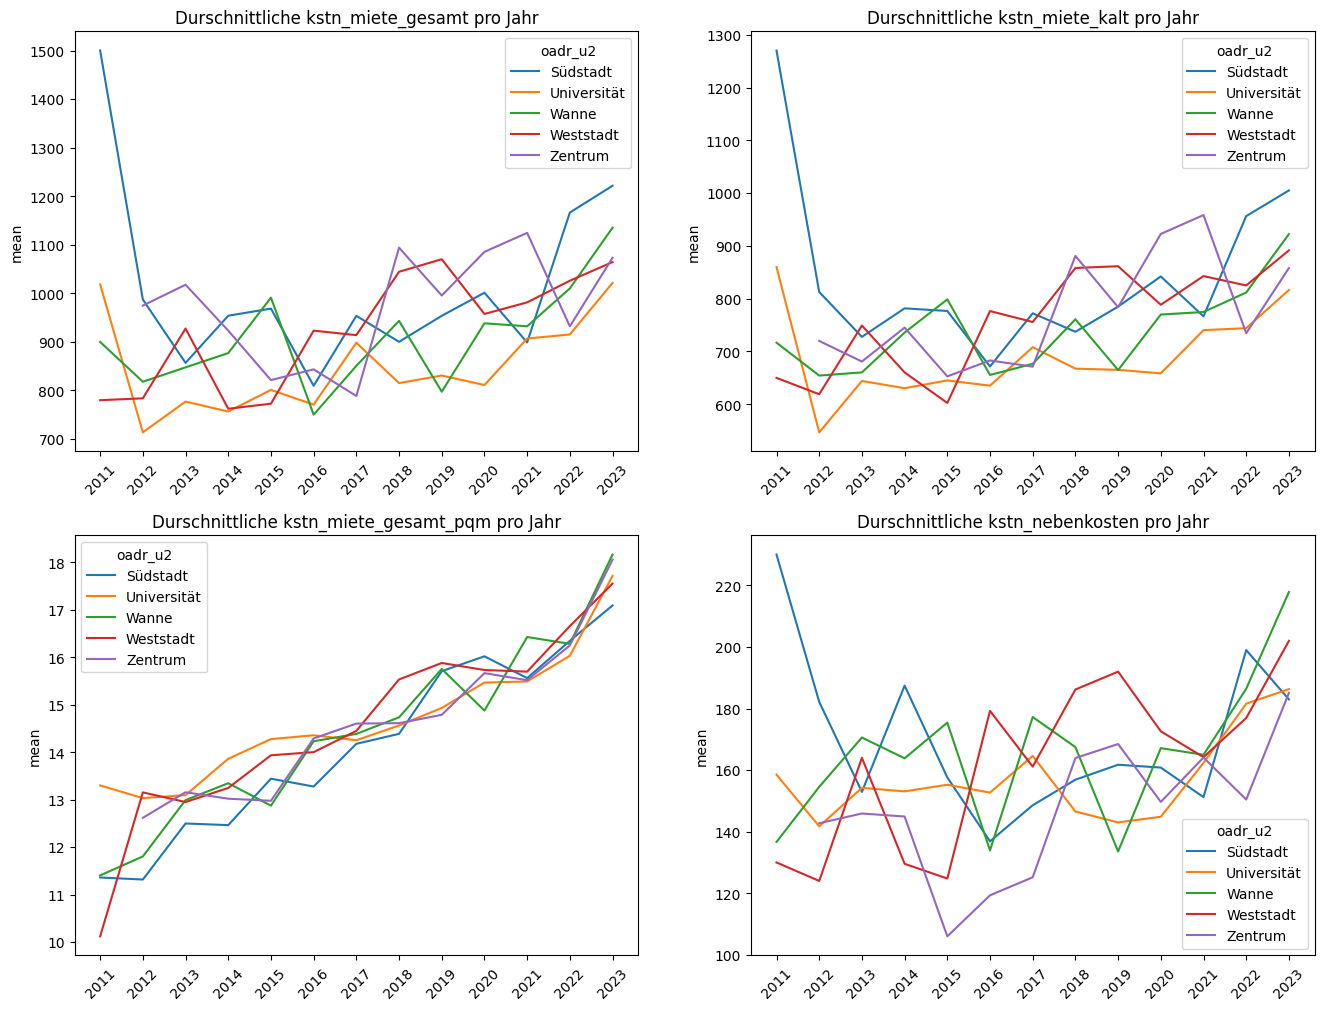

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Iterate through the top five regions and create a seaborn plot for each
for i, price_type in enumerate(interesting_prices):
    row, col = divmod(i, 2)
    subset_df = filtered_df.groupby(["oadr_u2", "year"])[price_type].mean().reset_index(name='mean')
    g = sns.lineplot(x="year", y="mean", hue="oadr_u2", data=subset_df, ax=axes[row, col])
    axes[row, col].set_title(f"Durschnittliche {price_type} pro Jahr")
    axes[row, col].set_xlabel("")
    axes[row, col].tick_params(axis='x', rotation=45)


kaltmiete pro quadratmeter

Nebenkosten hat gut Schwankung, warum ? 

In [23]:
# check how many entries we have for each of these calculations above

## Teste Korrelation Mietkosten und Nebenkosten (müsste positiv sein eig)


In [24]:
filtered_df

,angebot_id,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,kosten,kosten_je_flaeche,kosten_miete_gesamt_janein,kstn_betriebskosten,kstn_betriebskosten_pqm,kstn_heizung,laufzeitw_alle,laufzeitw_geschl,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,kstn_nebenkosten,kstn_miete_kalt,kstn_miete_gesamt,kstn_miete_gesamt_pqm,kstn_miete_kalt_pqm,kstn_kaufpreis,kstn_kaufpreis_pqm,kstn_heizung_pqm,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,oadr_u3,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,zust_modernisierungsjahr,zust_gepflegt_janein,startdate,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,enddate,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,year
1,3594016393,NaN,"2,",0,1,0,0,0,0,0,0,0,0,Gas,0,0,0,NaN,0,1,0,0,1,0,0,0,0,0,0,0,1980.0,"50,","0,","3,","50,","750,","15,",0,NaN,NaN,NaN,",1",NaN,miete,Wohn,8,8416041,8416,120.0,750.0,870.0,17.40,"15,",NaN,NaN,NaN,Tübingen,Tübingen,72070,Tübingen,Universität,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,1,0,0,2023.0,0,2023-11-15,WHG_M,0,0,0,0,0,1,0,0,-1,NaN,0,0,0,2023
3,3594255459,1.0,"3,",0,1,1,0,1,0,0,0,0,0,NaN,1,0,0,Zentral,0,0,0,0,1,0,0,1,0,0,0,0,2011.0,"109,58","3,",NaN,"109,58","1750,","15,97",0,NaN,NaN,NaN,",2",NaN,miete,Wohn,8,8416041,8416,300.0,1750.0,2050.0,18.71,"15,97",NaN,NaN,NaN,Tübingen,Tübingen,72074,Tübingen,Zentrum,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,1,2023-11-14,WHG_M,0,0,0,0,0,1,0,-1,0,NaN,1,0,0,2023
5,3593974527,2.0,"2,5",0,0,0,0,1,0,0,0,0,0,Gas,0,0,0,NaN,0,1,0,0,0,1,0,1,0,1,0,0,1989.0,"65,47","0,",NaN,"65,47","299000,","4566,98",0,NaN,NaN,NaN,",1",NaN,kauf,Wohn,8,8416041,8416,NaN,NaN,NaN,NaN,NaN,"299000,","4566,98",NaN,Tübingen,Tübingen,72072,Tübingen,Südstadt,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,0,0,NaN,1,2023-11-14,WHG_K,0,0,0,0,0,1,0,0,-1,NaN,1,0,0,2023
7,3593840812,1.0,"3,",0,1,0,1,0,0,0,0,0,0,Gas,0,0,0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,1990.0,"60,36","1,",NaN,"60,36","229000,","3793,9",0,NaN,NaN,NaN,",2",NaN,kauf,Wohn,8,8416041,8416,NaN,NaN,NaN,NaN,NaN,"229000,","3793,9",NaN,Tübingen,Tübingen,72072,Tübingen,Südstadt,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,-1,0,0,NaN,0,2023-11-14,WHG_K,0,0,0,0,0,1,0,0,1,NaN,1,0,0,2023
8,3593834802,8.0,"18,5",0,0,0,0,0,0,0,1,0,0,Alternativ,0,0,0,Zentral,0,0,0,0,0,0,0,1,0,1,0,0,1876.0,"576,5",NaN,"3,","516,5","1600000,","2775,37",0,NaN,NaN,NaN,",2",NaN,kauf,Misch,8,8416041,8416,NaN,NaN,NaN,NaN,NaN,"1600000,","2775,37",NaN,Tübingen,Tübingen,72072,Tübingen,Südstadt,NaN,Gebaeude,Mischgebaeude,Wohn/Gesch-GB,MFH/WGH,1,0,0,0,NaN,1,2023-11-14,MFHWGH_K,0,0,0,0,0,1,0,0,0,NaN,1,0,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,78391091,1.0,"3,",0,1,1,1,1,0,0,0,0,0,Gas,0,1,0,Zentral,0,1,1,0,1,0,0,1,0,0,0,0,2006.0,"90,","4,","5,","90,","398000,","4422,22",0,"215,","2,39",NaN,"65,4","65,4",kauf,Wohn,8,8416041,8416,NaN,NaN,NaN,NaN,NaN,"398

[Text(0.5, 0, 'kstn_miete_gesamt'),
 Text(1.5, 0, 'kstn_miete_kalt'),
 Text(2.5, 0, 'kstn_miete_gesamt_pqm'),
 Text(3.5, 0, 'kstn_nebenkosten')]

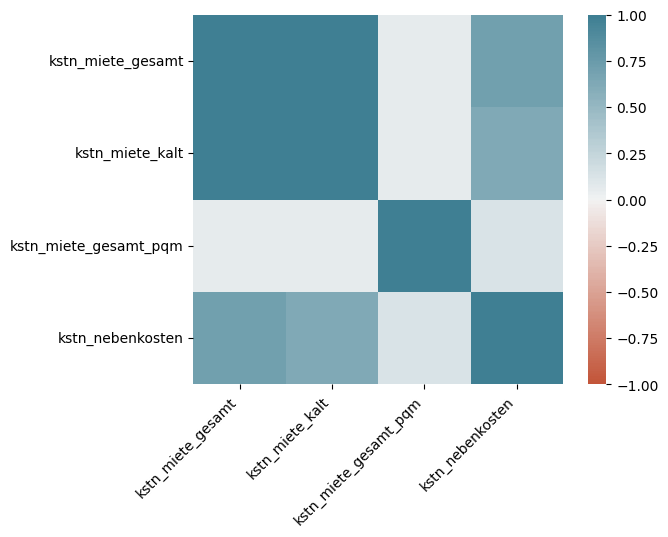

In [25]:
corr = filtered_df[interesting_prices].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)